## Week 10 - Exercise 2
### Fourier analysis 
### FFT, data compression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### load data, extract time and July temperature for Atlanta

In [62]:
df=pd.read_excel("https://o2.eas.gatech.edu/data/ATL_MonMeanTemp_1879_2020.xls",skiprows=1)
# convert pandas data frame to numpy matrix
data=df.to_numpy()
year=data[:,0] # get time
TMP_ATL_JUL=data[:,7] # get July temperature
TMP_ATL_JUL

array([79.6, 79.2, 81.1, 75.9, 80.1, 77.7, 78.8, 76.7, 77.8, 79.1, 78.5,
       78.1, 75.4, 76.4, 80.6, 76.2, 77. , 78.2, 78.4, 77.9, 79.2, 78.8,
       80.3, 80.3, 78.4, 77. , 77.9, 76. , 80.1, 77.8, 77.2, 76.7, 76.1,
       77.1, 79.5, 79.1, 78.7, 76.3, 78. , 76.5, 77.3, 77.3, 78.7, 77.8,
       77.1, 78.2, 80.9, 78.5, 77.6, 78.8, 77.7, 81.3, 81. , 80.6, 77.3,
       79.9, 79.7, 81.2, 79.5, 79.2, 80.3, 77.2, 80. , 80.4, 79.9, 78.3,
       79.2, 77.8, 77. , 80.1, 79.8, 77.5, 79.1, 82. , 78.7, 82.1, 79.1,
       79.3, 79. , 78.7, 79.1, 80.3, 76.3, 78.5, 75.8, 76.5, 76.6, 78.2,
       74.1, 77.6, 80.8, 78.6, 76.3, 76.7, 78.9, 77.8, 76.4, 76.4, 79.5,
       78.6, 78.8, 85.1, 82.2, 79.1, 81.4, 76.8, 78.3, 84.1, 81. , 80.5,
       79.8, 80.5, 80.9, 80.2, 85.3, 79.1, 84.3, 81.8, 78.8, 80.7, 79.1,
       81.4, 78.6, 80.4, 77.9, 79.5, 79.4, 81. , 78.4, 79.8, 78.1, 82.3,
       82.4, 83.8, 77.5, 77.9, 81.3, 83.4, 81.2, 80.8, 82.2, 82.1])

### apply FFT and get frequency axis

In [63]:
x=year
y=TMP_ATL_JUL
N = np.size(x)     # number of data points
c=np.fft.fft(y) # apply FFT

### make a simple plot of July temperature: original vs. reconstructed using FFT coefficients

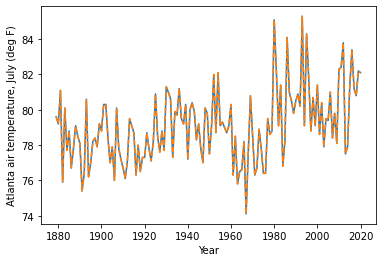

In [64]:
yest=np.fft.ifft(c)
fig=plt.figure()
plt.plot(year,TMP_ATL_JUL)
plt.plot(x,np.real(yest),'--')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, July (deg F)')
plt.show()

In [159]:
# check the complex FFT coefficients
# c values are complex number, FFT coefficients in frequency domain
# if input values y are real, c is conjugate symmetric
c
c[0]/N
np.mean(y)

79.0774647887324

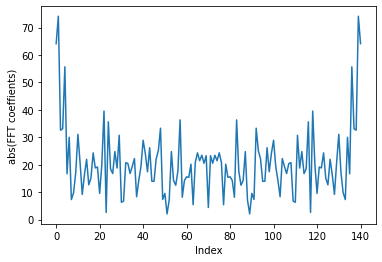

In [66]:
# get the absolute values for the coefficients
# omitting the first coefficient (constant)
fig=plt.figure()
plt.plot(abs(c[1:]))
plt.xlabel('Index')
plt.ylabel('abs(FFT coeffients)')
plt.show()

In [160]:
#  get unique coefficients and frequency axis 
K=np.ceil((N+1)/2).astype(int) # set K = N/2
print(K)
c1=c[0:K]
freq=np.arange(0,1/2+0.5/N,1/N)

72


### get the periodogram 

Text(0.5, 1.0, 'periodogram of Atlanta Temperature')

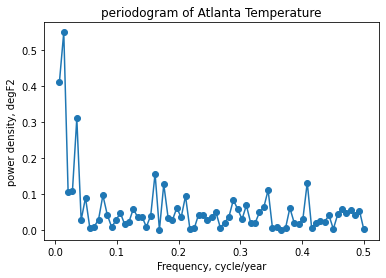

In [68]:
fig=plt.figure()
# calculate the power spectrum
P0=2*abs(c1[1:])**2/N/(N-1); # multiply by 2 because there are both positive and negative frequencies
freq0=freq[1:]; # discard the constant term (freq=0)

plt.plot(freq0,P0,'o-')
plt.xlabel('Frequency, cycle/year')
plt.ylabel('power density, degF2');
plt.title('periodogram of Atlanta Temperature')

### Application 1: data compression, approximation with reduced dimensions
let's pick up only strong frequency components: X% compression factor

Truncation: In the frequency domain, I look at X percentile value of Fourier coefficient, and only retain stronger coefficients by setting weaker ones to zero.


In [139]:
X=75;
P2=abs(c)**2/N/(N-1);

# get the threshold for 75% percentile 
threshold=np.percentile(P2,X)
print(threshold)
cX=np.copy(c)
cX[P2<threshold]=0 # remove all weak frequency components


0.029577513260298994


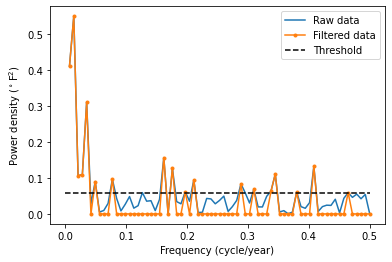

In [140]:
# plot the periodogram of filtered data
fig=plt.figure()

var0=2*abs(c[1:K])**2/N/(N-1); # full Fourier series
var1=2*abs(cX[1:K])**2/N/(N-1); # with filtered data

plt.plot(freq0,np.real(var0),'-',label='Raw data');

plt.plot(freq0,np.real(var1),'.-',label='Filtered data');
plt.plot([0, 0.5],[2*threshold,2*threshold],'--k',label='Threshold');
plt.legend();
plt.xlabel('Frequency (cycle/year)');
plt.ylabel('Power density ($^\circ$F$^2$)');

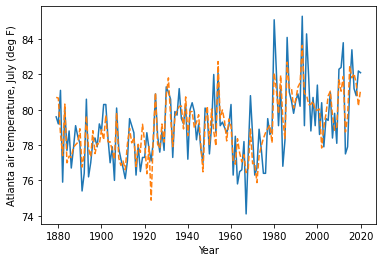

In [141]:
### inverse fft to reconstrct in time domain
yest=np.fft.ifft(cX)
fig=plt.figure()
plt.plot(year,TMP_ATL_JUL,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Compressed data')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, July (deg F)')
plt.show()

In [142]:
## percentage of variance explained by the filtered data
var_tot=sum(var0) # total variance calculated based on FFT coefficients
var_filtered=sum(var1) # variance of filtered data


var_y=np.var(y,ddof=1) # actually total variance
var_yest=np.var(yest,ddof=1) # actual variance of filtered data

pct=var_yest/var_tot # percentage of variance retained

print('Total variance calculated from FFT coefficients = '+str(round(var_tot,2)))
print('Actual total variance = '+str(round(var_y,2)))

print('Variance of filtered data from FFT coeff. = '+str(round(var_filtered,2)))
print('Actual variance of filtered data = '+str(round(var_yest,2)))

print(str(X),'percentile compressed data retained '+str(round(pct*100,1)),'% of variance.')

Total variance calculated from FFT coefficients = 4.1
Actual total variance = 4.1
Variance of filtered data from FFT coeff. = 2.69
Actual variance of filtered data = 2.69
75 percentile compressed data retained 65.6 % of variance.


### Application 2: low-pass FFT filter

In [143]:
f_pass=1/10 # low pass filter to remove any frequencies higher than 1/10 cycle/year (period shorter than 10 years) 
ind_low_pass=np.where(freq0<f_pass)
N_low=np.size(ind_low_pass) # determine how many terms to include
print(str(N_low)+' terms')
# take the first N_low+1 (including the first term), and the last N_low terms
cX=0*c
cX[0:N_low+1]=c[0:N_low+1]
cX[-N_low:]=c[-N_low:]

14 terms


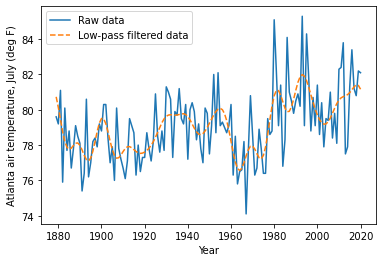

In [146]:
### inverse fft to reconstruct in time domain
yest=np.fft.ifft(cX)
fig=plt.figure()
plt.plot(year,TMP_ATL_JUL,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Low-pass filtered data')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, July (deg F)')
plt.legend()
plt.show()

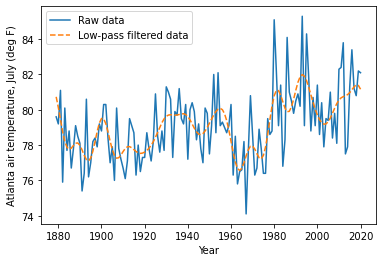

In [158]:
# alternatively, use the fft.fftfreq() function to get frequency axis (only work in Python)
f_pass=1/10 
fft_freq=np.fft.fftfreq(N)
fft_freq
cX2=0*c
cX2[abs(fft_freq)<f_pass]=c[abs(fft_freq)<f_pass]

yest=np.fft.ifft(cX2)
fig=plt.figure()
plt.plot(year,TMP_ATL_JUL,label='Raw data')
plt.plot(x,np.real(yest),'--',label='Low-pass filtered data')
plt.xlabel('Year')
plt.ylabel('Atlanta air temperature, July (deg F)')
plt.legend()
plt.show()